## Group No 8

## Group Member Names:

1. Rekha N - 2022dc04058
2. Prabhakaran J - 2022dc04186
3. Sujitha J - 2022dc04059


# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Data Acquisition and Data Preperation

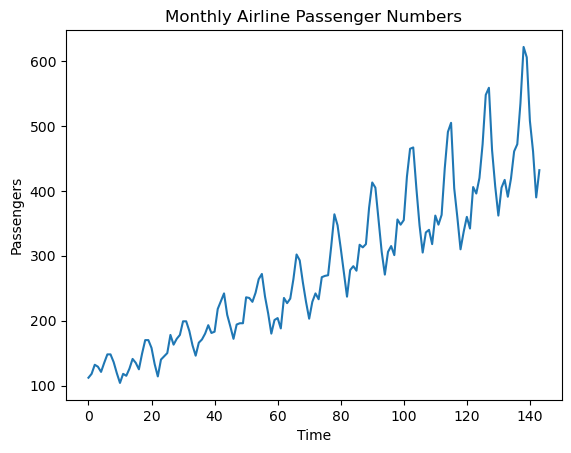

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1])  # Only load the 'Passengers' column
data = data.values  # Convert to a numpy array
data = data.astype('float32')  # Ensure data is in float32 format

# Plot the dataset
plt.plot(data)
plt.title("Monthly Airline Passenger Numbers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for the GRU
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 12  # Using past 12 months to predict the next month
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape the data for the GRU (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


Data has been scaled using min max normalization. Data is then split into test and train data.

# Training the model

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


C:\Users\Sujitha\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0825 - val_loss: 0.2725
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0646 - val_loss: 0.2266
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0523 - val_loss: 0.1816
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0369 - val_loss: 0.1394
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0271 - val_loss: 0.0984
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0186 - val_loss: 0.0636
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0145 - val_loss: 0.0441
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - val_loss: 0.0380
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0137 - val_loss: 0.0403
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - val_loss: 0.0427
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0102 - val_loss: 0.0422
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0091 - val_loss: 0.0381


# Test the model and get the predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


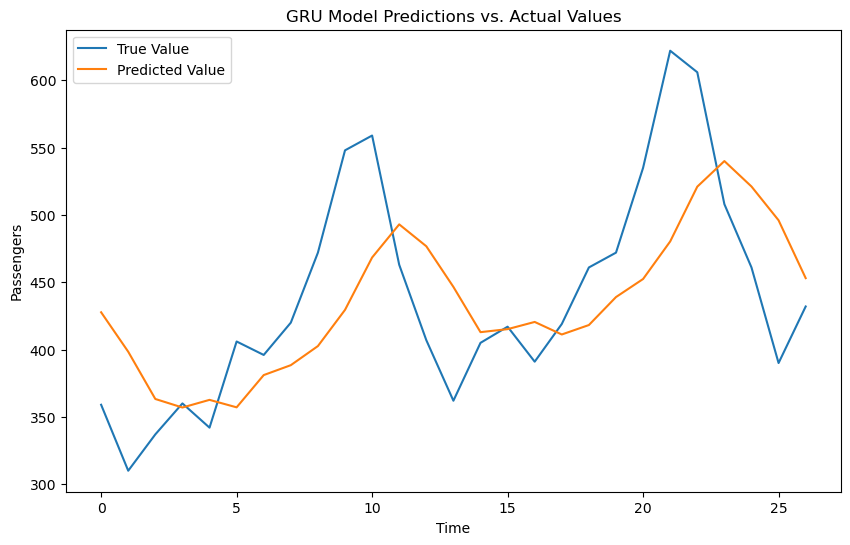

Mean Squared Error: 4134.09619140625
Root Mean Squared Error: 64.29693603515625
Mean Absolute Error: 52.470603942871094


In [4]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('GRU Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')


n MSE of 4134.096 suggests there is a significant error in the GRU model's predictions. This number needs context (such as the range of your data) to determine how large the error actually is.

An RMSE of 64.297 means that, on average, your GRU model's predictions deviate from the actual values by about 64.3 units. Lower RMSE values indicate better model performance, and like MSE, the acceptability of this value depends on the scale of your target variable.
An RMSE of 64.297 means that, on average, your GRU model's predictions deviate from the actual values by about 64.3 units. Lower RMSE values indicate better model performance, and like MSE, the acceptability of this value depends on the scale of your target variable.
The MAE of 52.471 means that, on average, the model's predictions differ from the actual values by 52.5 units. This metric gives a clearer idea of the average magnitude of the errors.